# TP 3- Méthodes itératives
## Analyse Numérique Matricielle
### Polytech SU, 2023-2024


In [3]:
import numpy as np
from scipy.linalg import hilbert
import matplotlib.pyplot as plt


### Exercice 1: 

On considère les systèmes linéaires $ A_\epsilon x = b_\epsilon $ pour $ \epsilon \in [0, 1] $ où $ A_\epsilon $ et $ b_\epsilon $ sont définis comme suit: 
$$
A_{\epsilon} = \begin{pmatrix} 1 & \epsilon & \epsilon^{2} & 0 &  \dots & 0 \\
\epsilon & 1&\epsilon& \epsilon^{2}& \ddots& \vdots \\
\epsilon^{2}&  \ddots & \ddots & \ddots & \ddots & 0 \\
0 &  \ddots & \ddots & \ddots & \ddots & \epsilon^{2} \\
\vdots & \ddots & \epsilon^{2}& \epsilon& 1& \epsilon \\
0& \dots& 0& \epsilon^{2}& \epsilon & 1
\end{pmatrix} \quad \quad \text{ et } \quad \quad b_{\epsilon} = A_{\epsilon} \begin{pmatrix} 1\\ \vdots \\\vdots \\\vdots \\\vdots \\1 \end{pmatrix}
$$
1. 
   Écrivez une fonction Python `construire_A_b(n, epsilon)` qui construit et retourne la matrice $ A_\epsilon $ et le vecteur $ b_\epsilon $ pour des valeurs données de $ n $ et $ \epsilon $.


In [4]:
###1. Construction de la matrice $ A_\epsilon $ et du vecteur $ b_\epsilon $ :


def construire_A_b(n, epsilon):
      A = np.zeros((n, n))
      for i in range(n):
          for j in range(n):
              A[i, j] = epsilon ** abs(i - j) if abs(i- j) <3 else 0
      b = np.dot(A, np.ones(n))
      return A, b


L'objectif est d'implémenter deux méthodes du type II pour résoudre l'équation $A_{\epsilon}x = b_{\epsilon}$. Pour cela, on décompose la matrice $A_{\epsilon}$ comme $A_{\epsilon} = D-E-F$ avec $D$ diagonale, $E$ triangulaire supérieure et $D$ triangulaire inférieure (les deux dernières matrices ayant une diagonale nulle). Par exemple, pour $n = 4$, on a
$$
D = \begin{pmatrix}1&0&0&0 \\0&1&0&0 \\0&0&1&0 \\0&0&0&1  \end{pmatrix}, 
\quad F = \begin{pmatrix} 0&-\epsilon & - \epsilon^{2}& 0\\ 0&0&-\epsilon & -\epsilon^2 \\ 0&0&0&-\epsilon \\ 0&0&0&0 \end{pmatrix} , \quad E = \begin{pmatrix} 0&0&0&0\\-\epsilon &0&0&0\\ -\epsilon^2 & -\epsilon & 0&0 \\ 0&-\epsilon^2 & -\epsilon & 0 \end{pmatrix}
$$

2. On considère ici $n=5$. La méthode de Jacobi consiste à poser $M = D$ et $N=E+F$.
    
    a. On pose $\epsilon = 0.3$. Implémenter la méthode de Jacobi en partant de $x_{0} = 0$ et en l'arretant quand $\left\| x_{k+1} - x_{k} \right\| < 10^{-10}$ (pour cela, on pourra utiliser une boucle `while`). Afficher le nombre $k_{0}$ nécessaires aisni que la différene en norme entre $x_{k_{0}}$ et la solution $\overline{x} = (1,\ldots ,1)^{T}$.

In [5]:
###2.a Implémentation de la méthode de Jacobi.
n=4
epsilon=0.3
A, b =construire_A_b(n,epsilon)
arret=10**(-10)
x_estim = np.zeros(n)
x_true=x_estim+1
D = np.diag(A)
D=np.diag(D)
D_inv = np.diag(1 / np.diag(D))
E = np.triu(A,k=1)
F = np.tril(A,k=-1)
J= D_inv @( -(E+F))
k = 0
kmax=1000
while k<kmax:
    x_new =  J @ x_estim + D_inv @ b
    if np.linalg.norm(x_new - x_estim,ord=2) < arret:
        break
    x_estim = x_new
    k += 1
    
print(np.linalg.norm(x_true-x_estim,ord=2))
print(k)


5.3182527347836164e-11
43


2.b Implémenter la méthode itérative pour $\epsilon = 0,0.1,0.2, \ldots ,1$. Si $\left\| x_{k} - x_{k+1} \right\| > 100$, on considère que la méthode ne converge pas et on arrête le processus. Pour chaque valeur de $\epsilon$, enregistrer le nombre d'itérations $k_{\epsilon}$ ainsi que l'erreur finale $\eta_{\epsilon}$. Que remarquez vous?

In [6]:
###2.b Implémetnations pour différents epsilon
epsilons = np.arange(0, 1.1, 0.1)
k_values = []
errors = []

for epsilon in epsilons:
    A, b =construire_A_b(n,epsilon)
    arret=10**(-10)
    x_estim = np.zeros(n)
    x_true=x_estim+1
    D = np.diag(A)
    D=np.diag(D)
    D_inv = np.diag(1 / np.diag(D))
    F = np.triu(A,k=1)
    E = np.tril(A,k=-1)
    J= D_inv @( -(E+F))
    k = 0
    kmax=1000
    while k<kmax:
        x_new =  J @ x_estim + D_inv @ b
        if np.linalg.norm(x_new - x_estim,ord=2) < arret:
            break
        if np.linalg.norm(x_new - x_estim,ord=2) > 100:
            break
        x_estim = x_new
        k += 1
    error=np.linalg.norm(x_estim-x_true,ord=2)
    k_values.append(k)
    errors.append(error)

print(errors)
print(k_values)
print(epsilons)




[0.0, 3.523595695904144e-11, 4.4032770297327995e-11, 5.318278619657711e-11, 5.162197116036477e-11, 49.469921937962674, 48.582945334843394, 50.947710839114826, 48.36697633970999, 48.028604309360496, 33.37663853655727]
[1, 14, 24, 43, 106, 81, 12, 7, 5, 4, 3]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


2.c. Pour chaque valeur de $\epsilon$ précédemment utilisée, calculer le rayon spectral. On pourra utiliser les fonctions `np.linalg.eig` et `np.abs`.

In [7]:
###2.c Etude du rayon
rayons = []

for epsilon in epsilons:
    A, b =construire_A_b(n,epsilon)
    arret=10**(-10)
    x_estim = np.zeros(n)
    x_true=x_estim+1
    D = np.diag(A)
    D=np.diag(D)
    D_inv = np.diag(1 / np.diag(D))
    F = np.triu(A,k=1)
    E = np.tril(A,k=-1)
    J= D_inv @( -(E+F))
    vp, vectp =np.linalg.eig(J)
    absvp=np.abs(vp)
    rayon=np.max(absvp)
    rayons.append(rayon)

print(rayons)



[0.0, 0.1708304597359459, 0.36000000000000043, 0.567851648315524, 0.7946427498927401, 1.040569415042095, 1.3057832768544124, 1.5904031602668562, 1.8945233353815514, 2.218219443394963, 2.561552812808829]


2.d Commparer les graphe de $\rho(\epsilon)$ avec celui de $k_{\epsilon}$ et $\eta_{\epsilon}$.

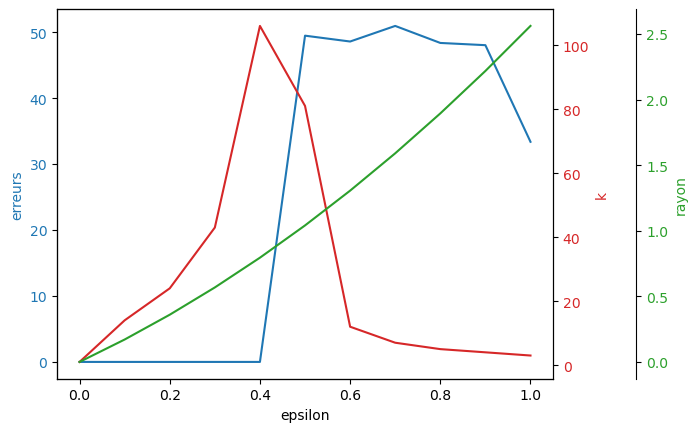

In [8]:

###2.d Comparaison
fig, ax1 = plt.subplots()

ax1.set_xlabel('epsilon')
ax1.set_ylabel('erreurs', color='tab:blue')
ax1.plot(epsilons,errors, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Créer un deuxième axe y partageant le même axe x
ax2 = ax1.twinx()  
ax2.set_ylabel('k', color='tab:red')  
ax2.plot(epsilons,k_values, color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Créer un troisième axe y partageant le même axe x
ax3 = ax1.twinx()  
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('rayon', color='tab:green')  
ax3.plot(epsilons,rayons, color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Afficher le graphique
plt.show()
 





3. Refaire le même travail mais pour la méthode de Gauss-Seidel, i.e en prenant M = D-E  et  N=F.

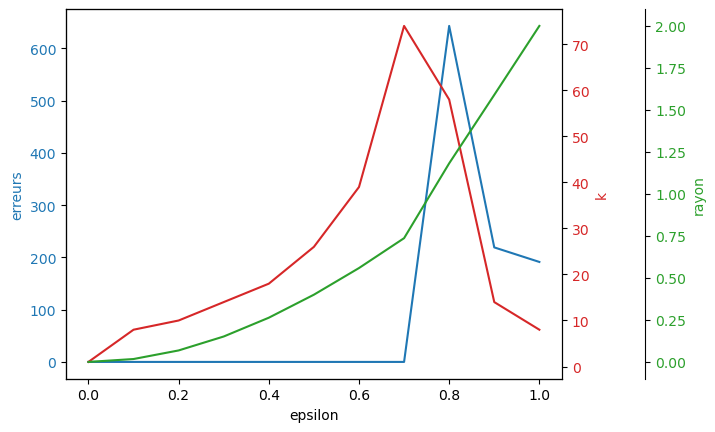

In [16]:
#### 3. Gauss Seidel
epsilons = np.arange(0, 1.1, 0.1)
k_values_GS = []
errors_GS = []
rayons_GS = []

for epsilon in epsilons:
    A, b =construire_A_b(n,epsilon)
    arret=10**(-10)
    x_estim_GS = np.zeros(n)
    x_true=x_estim_GS+1
    D = np.diag(A)
    D=np.diag(D)
    F = -np.triu(A,k=1)
    E = -np.tril(A,k=-1)
    M= (D-E) 
    N=F
    invM=np.linalg.inv(M)
    B=invM@N
    k = 0
    vp_GS, vectp_GS =np.linalg.eig(B)
    absvp_GS=np.abs(vp_GS)
    rayon_GS=np.max(absvp_GS)
    rayons_GS.append(rayon_GS)
    kmax=1000
    while k<kmax:
        x_new_GS = np.linalg.solve(M, N @ x_estim_GS +   b)
        if np.linalg.norm(x_new_GS - x_estim_GS,ord=2) < arret:
            break
        if np.linalg.norm(x_new_GS - x_estim_GS,ord=2) > 100:
            break
        x_estim_GS = x_new_GS
        k += 1
    error_GS=np.linalg.norm(x_estim_GS-x_true,ord=2)
    k_values_GS.append(k)
    errors_GS.append(error_GS)


    
  ###Plot
fig, ax1 = plt.subplots()

ax1.set_xlabel('epsilon')
ax1.set_ylabel('erreurs', color='tab:blue')
ax1.plot(epsilons,errors_GS, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Créer un deuxième axe y partageant le même axe x
ax2 = ax1.twinx()  
ax2.set_ylabel('k', color='tab:red')  
ax2.plot(epsilons,k_values_GS, color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Créer un troisième axe y partageant le même axe x
ax3 = ax1.twinx()  
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('rayon', color='tab:green')  
ax3.plot(epsilons,rayons_GS, color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Afficher le graphique
plt.show()
 

  



4. Comparer les résultats obtenus avec les deux méthodes. On pourra utiliser la fonction `semilogy`.

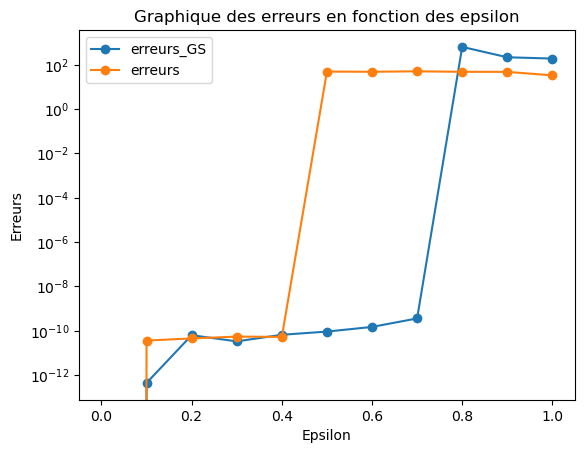

In [17]:
  ###Plot
plt.figure()
plt.semilogy(epsilons, errors_GS, label='erreurs_GS', marker='o')
plt.semilogy(epsilons, errors, label='erreurs', marker='o')

# Ajouter des titres et des légendes
plt.title('Graphique des erreurs en fonction des epsilon')
plt.xlabel('Epsilon')
plt.ylabel('Erreurs')
plt.legend()